## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [3]:
# Set seed
np.random.seed(seed=SEED)

In [13]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    slope = 2.5
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = slope * X + random_noise # add some noise
    return X, y


In [14]:
# Generate linear random data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.stack([X, y]).T
print(data[:5])

[[ 0.         -0.22877757]
 [ 1.         -1.6914393 ]
 [ 2.          8.73434947]
 [ 3.         25.11207713]
 [ 4.         26.37207485]]


In [15]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()


,X,y
0,0.0,-0.228778
1,1.0,-1.691439
2,2.0,8.734349
3,3.0,25.112077
4,4.0,26.372075


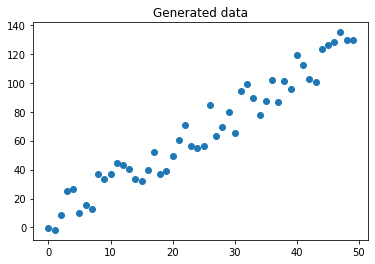

In [16]:
# scatter plot 
plt.scatter(x=df['X'], y=df['y'])
plt.title('Generated data')
plt.show()

### LR with Numpy

In [17]:
TRAIN_SIZE = 0.7
TEST_SIZE = 0.15
VAL_SIZE = 0.15

In [18]:
# shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [19]:
# split indices
train_start = 0
train_end = int(TRAIN_SIZE * NUM_SAMPLES)

val_start = train_end
val_end = int((TRAIN_SIZE + VAL_SIZE) * NUM_SAMPLES)

test_start = val_end

In [20]:
# split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]

X_val = X[val_start:val_end]
y_val = y[val_start:val_end]

X_test = X[test_start:]
y_test = y[test_start:]

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [21]:
# standardize data
def standardize_data(data, mean, std):
    return (data - mean) / std

In [22]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [23]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)


In [24]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -0.9, std: 0.7
mean: -0.9, std: 0.5


In [30]:
# X and y are 1-dimensional
INPUT_DIM = X_train.shape[1]
OUPTUT_DIM = y_train.shape[1]

In [28]:
# initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUPTUT_DIM)
b = np.zeros((1, 1))
print(f"W: {W.shape}")
print(f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [29]:
# model
# forward pass -> [Nx1] . [1x1] = [Nx1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


In [31]:
# loss
N = len(y_train)
loss = (1 / N) * np.sum((y_train - y_pred)**2)
print(f"Loss: {loss:.2f}")

Loss: 1.01


In [32]:
# backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [33]:
# update weights
LEARNING_RATE = 1e-1

W += -LEARNING_RATE * dW
b += -LEARNING_RATE * b

In [46]:
# Training

In [38]:
NUM_EPOCHS = 200

In [39]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUPTUT_DIM)
b= np.zeros((1, ))

# training loop
for epoch_num in range(NUM_EPOCHS):
    # forward pass -> [Nx1] . [1x1] = [Nx1]
    y_pred = np.dot(X_train, W) + b

    # loss
    loss = (1 / len(y_train)) * np.sum((y_train - y_pred)**2)

    # show progress
    if epoch_num%10 == 0:
        print(f"Epoch: {epoch_num}, Loss: {loss:.3f}")
    
    # backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # update weights
    LEARNING_RATE = 1e-1

    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * b


Epoch: 0, Loss: 1.032
Epoch: 10, Loss: 0.061
Epoch: 20, Loss: 0.050
Epoch: 30, Loss: 0.050
Epoch: 40, Loss: 0.050
Epoch: 50, Loss: 0.050
Epoch: 60, Loss: 0.050
Epoch: 70, Loss: 0.050
Epoch: 80, Loss: 0.050
Epoch: 90, Loss: 0.050
Epoch: 100, Loss: 0.050
Epoch: 110, Loss: 0.050
Epoch: 120, Loss: 0.050
Epoch: 130, Loss: 0.050
Epoch: 140, Loss: 0.050
Epoch: 150, Loss: 0.050
Epoch: 160, Loss: 0.050
Epoch: 170, Loss: 0.050
Epoch: 180, Loss: 0.050
Epoch: 190, Loss: 0.050


In [40]:
W

array([[0.97478122]])

In [41]:
b

array([0.])

In [42]:
# predctions
pred_train = W * X_train + b
pred_test = W * X_test + b

# MSE
train_mse = np.mean((y_train - pred_train)**2)
test_mse = np.mean((y_test - pred_test)**2)

print(f"train MSE: {train_mse:.2f}, test MSE: {test_mse:.2f}")

train MSE: 0.05, test MSE: 0.08


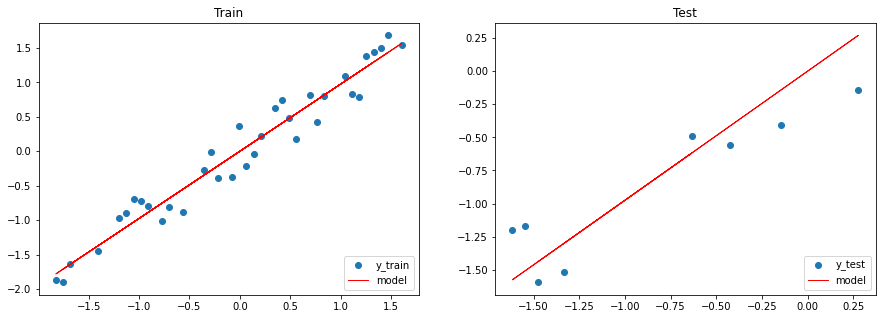

In [43]:
# Figure
plt.figure(figsize=(15, 5))

# plot train data
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter(X_train, y_train, label = 'y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

In [47]:
# Interoperability

In [48]:
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print (f"[actual] y = 2.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 2.5X + noise
[model] y_hat = 2.6X + 3.0


## LR Using PyTorch

In [107]:
import torch

# set seed data
torch.manual_seed(seed=SEED)

In [108]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)

print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")


train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


In [109]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [110]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [111]:
# Apply Scaling to the data
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [112]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")


mean: -0.6, std: 0.8
mean: -0.5, std: 0.8


In [113]:
# model weights
from torch import nn

In [114]:
# Inputs
N = 3
x = torch.randn(N, INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [115]:
# weights
m = nn.Linear(INPUT_DIM, OUPTUT_DIM)
print(m)
print(f"weights ({m.weight.shape}): {m.weight[0][0]}")
print(f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.34761226177215576
bias (torch.Size([1])): -0.3370760679244995


In [116]:
# forward pass
z = m(x)
print(z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[-0.32104054]
 [-0.19719592]
 [-0.68869597]]


In [117]:
# model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)

    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [118]:
model = LinearRegression(INPUT_DIM, OUPTUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [119]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true =  torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print("Loss: ", loss.numpy())

Loss:  0.75


In [120]:
# optimizer
from torch.optim import Adam

In [121]:
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

In [122]:
# training
# convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [123]:
for epoch in range(100):
    # forward pass
    y_pred = model(X_train)

    # loss
    loss = loss_fn(y_pred, y_train)

    # zero all gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    if epoch%20==0:
        print(f"Epoch: {epoch} | Loss: {loss:.2f}")
    

Epoch: 0 | Loss: 0.23
Epoch: 20 | Loss: 0.06
Epoch: 40 | Loss: 0.05
Epoch: 60 | Loss: 0.05
Epoch: 80 | Loss: 0.05


In [124]:
# predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [125]:
# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")


train_error: 0.05
test_error: 0.08


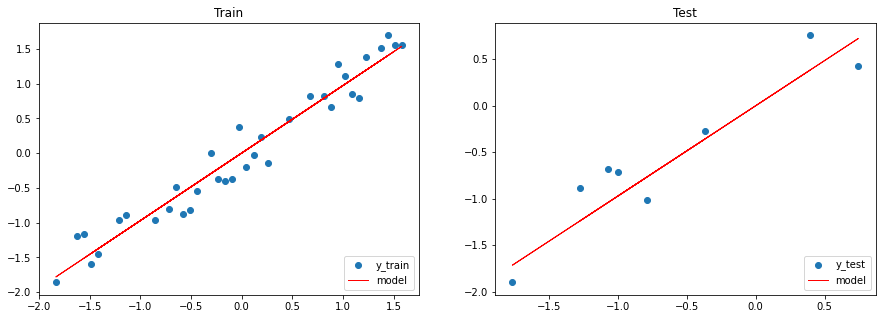

In [126]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()


In [127]:
# Feed in your own inputs
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))


In [128]:
# Unstandardize predictions
pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
    print(f"{df.iloc[index]['y']:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")


36.80 (actual) → 28.54 (predicted)
32.04 (actual) → 41.41 (predicted)
56.52 (actual) → 67.14 (predicted)


In [129]:
# Unstandardize coefficients
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled*X_scaler.mean_)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")


[actual] y = 3.5X + noise
[model] y_hat = 2.6X + 2.8


In [130]:
# regularization 
L2_LAMBDA = 1e-2
# Initialize model
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUPTUT_DIM)
# Optimizer (w/ L2 regularization)
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")


Epoch: 0 | loss: 0.64
Epoch: 20 | loss: 0.07
Epoch: 40 | loss: 0.05
Epoch: 60 | loss: 0.05
Epoch: 80 | loss: 0.05
Epoch: 100 | loss: 0.05
Epoch: 120 | loss: 0.05
Epoch: 140 | loss: 0.05
Epoch: 160 | loss: 0.05
Epoch: 180 | loss: 0.05


In [131]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)


In [132]:
# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")


train_error: 0.05
test_error: 0.08
